# 서포트 벡터 머신(Support Vector Machine)
- 선형 분류 알고리즘 중에서 가장 정확도가 높은 알고리즘 중 하나
- 기본 원리는 데이터를 나누는 최적의 경계를 만드는 방식 -> 기존 알고리즘과 다르지 않은 부분
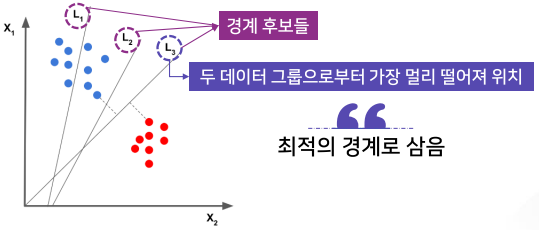

1. 마진과 서포트 벡터
- 서포트 벡터(Support Vector): 마진값이 가장 작은(경계에서 가장 가까운) 데이터
- 마진(Margin): 데이터와 경계 사이의 거리
- 서포트 벡터와 마진을 이용하여 그린 선은 최적의 경계가 되며, 초평면(Hyperplane)이라 한다.
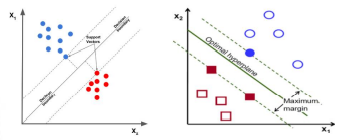
- 초평면 결정법  
① 데이터셋 설정  
② 먼저, 가장 가까이 있는 두 개의 다른 데이터를 기준으로 임의의 경계를 설정  
③ 서포트 벡터: 경계에서 가장 가까운 데이터들(서포트 벡터 머신) 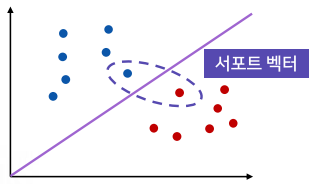  
④ 마진: 분류 경계와 각 서포트 벡터 사이의 거리 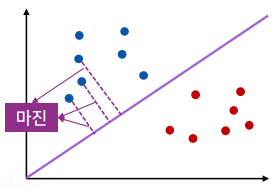  
⑤ 초평면: 마진의 합이 가장 크게 적용되는 최적의 경계 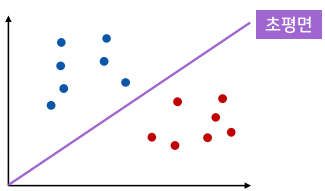  

2. 커널 트릭과 초평면
- SVM은 '커널 트릭'을 사용하여 초평면을 3차원으로 그림
- 커널(kernels): 단차원을 다차원으로 늘려주는 트릭
- 커널 트릭을 사용하면 2차원으로 분리하기 힘든 데이터도 분리가 가능함
- 수학적 정리  
① 평면의 방정식   
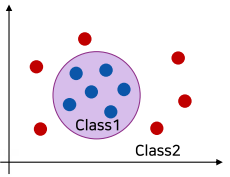  
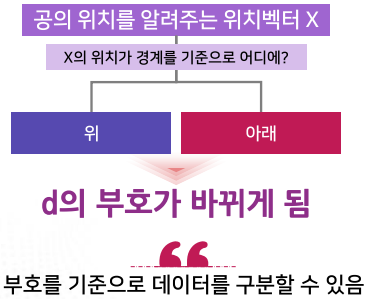  
② 제약 조건 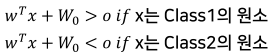  
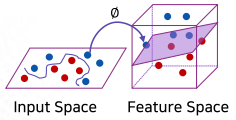  
  ** 제약조건의 생성: 1) 마진을 최대화하는 함수를 정의함 2) 정의한 함수에 라그랑지 승수법을 적용하면 최적의 조건을 가진 경계면을 구할 수 있음  
③ 비선형 경계면 구하기
  - 비선형 경계면을 구하기 위해 일단 경계가 원의 형태라고 가정
  - 원의 좌표가 (x,y)라고 가정한다면, 반지름 'r'을 갖고 있는 원의 형태를 가지는 원의 방정식을 가정할 수 있음
  - 이를 y에 대해 풀면 비선형 함수를 선형 함수로 변환할 수 있음 -> 차원이 복잡해짐
  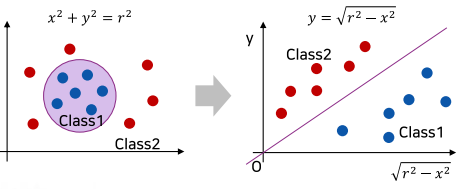
  - 매핑함수(mapping function): 변환하는 함수. 내적으로 선형 판별 경계를 찾을 수 있음 
  
3. SVM 사용시 주의사항
- SVM은 데이터 스케일링을 잘 해주어야 함 -> 특성에 해당하는 각 칼럼 값의 범위가 비슷하도록 조정해야 함
- 많이 사용하는 스케일러  
① **StandarScaler**: 평균을 0, 분산을 1로 변경하여 모든 특성이 같은 크기를 가지게 함  
② **MinMaxScaler**: 각 컬럼의 값이 0~1 사이로 오도록 함  
- SVM에서 조정해야 하는 '매개변수' 3가지: Kernel, Gamma, Cost

4. 파라미터(매개변수) 조정  
① Kernels: 단차원을 다차원으로 늘려주는 트릭  
  - 커널 용법 3가지: 'RBF', 'sigmoid', 'poly'  
  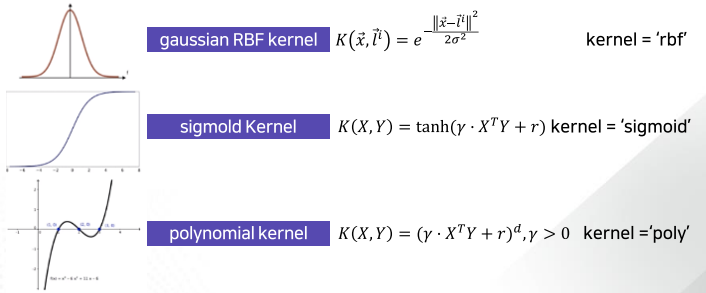  
  - 커널에 따라 다양한 매개변수 설정이 다르다.
  - 매개변수를 변경하면서 성능 변화를 관찰할 수 있다.  
    
  ② Gamma: 초평면과 데이터 사이의 거리(기본값 auto)  
  - 'RBF' 커널에는 Gamma 파라미터 값이 존재
  - Gamma 값이 작을 수록, 마진 값이 커지도록 SV를 구해야 함 -> 그러나 과적합 문제 발생할 수 있음
  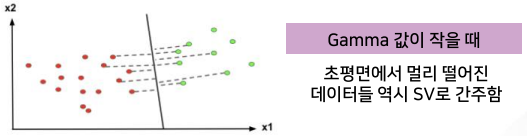
  - Gamma 값이 클 수록, 마진 값이 작도록 SV 값을 구해야 함
  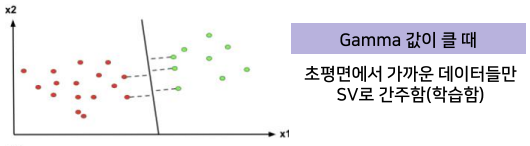
    
  ③ Cost: 과적합 비용(기본값 1.0)  
  - 어느 정도의 과적합 가능성을 감수하더라도 모델을 훈련 데이터에 맞추겠는지 여부를 의미
  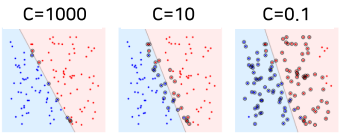
  - Cost가 클수록 성능이 좋아지지만, 너무 커지면 과적함 문제가 발생할 수 있음
  
5. SVM의 장/단점
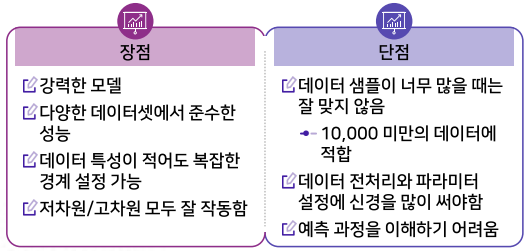
** 매개변수 설정은 그리드 서치를 사용하면 훨씬 쉽게 진행 가능

In [2]:
#모든 결과물 한꺼번에 display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity= "all"

# 필요한 모듈 로드하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 구글드라이브에서 현재 작업중인 코드로 데이터 불러오기
import pandas as pd
dataset = pd.read_csv('E:\\py_temp\\MachineLearning\\breast_cancer.csv')
# 출력 값이 2개인 breast_cancer 데이터를 활용하여 분석

# 데이터셋의 정보를 파악한다
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   clump_thickness              569 non-null    int64
 1   uniformity_of_cell_size      569 non-null    int64
 2   uniformity_of_cell_shape     569 non-null    int64
 3   marginal_adhesion            569 non-null    int64
 4   single_epithelial_cell_size  569 non-null    int64
 5   bare_nuclei                  569 non-null    int64
 6   bland_chromatin              569 non-null    int64
 7   normal_nucleoli              569 non-null    int64
 8   mitosis                      569 non-null    int64
 9   class                        569 non-null    int64
dtypes: int64(10)
memory usage: 44.6 KB


In [3]:
# Sklearn의 기본 데이터셋이 아니기 때문에 직접 X와 y 설정
# X와 Y를 할당해 준다 [열,행]
## iloc = index 를 기준으로 열 전체, 행은 0~8번 까지 X에 할당한다
## 파이썬의 인덱스 값은 0 부터 시작한다
## 파이썬의 범위는 시작점은 포함, 끝은 제외한다
### 예: 0:9 은 첫번째 값 부터 9번째값 까지
X= dataset.iloc[:,0:9]
## 10번째 값의 샘플 전체를 y에 할당한다
y= dataset.iloc[:,9]

#제대로 분리 되었는지 특성수를 확인한다
print(X.shape)
print(y.shape)

(569, 9)
(569,)


In [5]:
# 데이터의 출력값이 라벨이 아닌 정수(0,1)이기 때문에 계층화 옵션 사용
# 훈련 데이터/테스트 데이터 분리
from sklearn.model_selection import train_test_split

# 타겟 칼럼 계층화 옵션 활용
## breast_cancer 데이터의 클래스는 1.0으로 정수로 표시되어 있다
# stratify 옵션으로 타켓 칼럼값을 연속성 값이 아닌 분류치로 설정한다
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [6]:
from sklearn.svm import SVC  

#기본값으로 SVM 분석을 실시해 본다
svc = SVC()
#알고리즘을 훈련
svc.fit(X_train, y_train)

print("훈련 데이터 점수:", round(svc.score(X_train, y_train),3))
print("테스트 데이터 점수:", round(svc.score(X_test, y_test),3))

# 결과가 좋지 않음을 볼 수 있다

SVC()

훈련 데이터 점수: 0.634
테스트 데이터 점수: 0.636


In [12]:
# 데이터 스케일링: MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit (X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

MinMaxScaler()

In [13]:
from sklearn.svm import SVC  

#기본값으로 SVM 분석을 실시해 본다
svc = SVC()
#알고리즘을 훈련
svc.fit(X_train_scaled, y_train)

print("훈련 데이터 점수:", round(svc.score(X_train_scaled, y_train),3))
print("테스트 데이터 점수:", round(svc.score(X_test_scaled, y_test),3))

# 스케일링의 중요성을 알 수 있음 -> 정확도 상승

SVC()

훈련 데이터 점수: 0.967
테스트 데이터 점수: 0.951


In [14]:
from sklearn.svm import SVC  

#기본값으로 SVM 분석을 실시해 본다
svc = SVC(C=1,gamma=1,random_state=0)
#알고리즘을 훈련
svc.fit(X_train_scaled, y_train)

print("훈련 데이터 점수:", round(svc.score(X_train_scaled, y_train),3))
print("테스트 데이터 점수:", round(svc.score(X_test_scaled, y_test),3))

SVC(C=1, gamma=1, random_state=0)

훈련 데이터 점수: 0.967
테스트 데이터 점수: 0.951


In [15]:
svc = SVC(C=20, gamma=0.16)
svc.fit(X_train_scaled,y_train )

print("훈련 데이터 점수:", svc.score(X_train_scaled, y_train))
print("테스트 데이터 점수:", svc.score(X_test_scaled, y_test))

SVC(C=20, gamma=0.16)

훈련 데이터 점수: 0.9694835680751174
테스트 데이터 점수: 0.958041958041958
